# Prerequisites

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## Loading from results folder

In [2]:
df_FS_TH = pd.read_csv('results/Feature_stack_TH.csv')
df_M2_TH = pd.read_csv('results/Multiview-2_TH.csv')
df_M3_TH = pd.read_csv('results/Multiview-3_TH.csv')
df_FS_Global = pd.read_csv('results/Featurestack_global.csv')
df_M2_Global = pd.read_csv('results/Multiview-2_Global.csv')
df_M3_Global = pd.read_csv('results/Multiview-3_Global.csv')
df_NDWI = pd.read_csv('results/NDWI_test.csv')
df_hyperparameter_TH = pd.read_csv('results/hyperparameter_tuning.csv')
df_hyperparameter_Global = pd.read_csv('results/Global_hyperparameter_tuning.csv')

Summary of experiments

- Relationships between FS, M2, M3
- Visualizing and analysis of local Training
- Visualizing and analysis of Global Training
- Visualizing Hyperparameter Tuning

# Studying the Relationships between FS - M2 - M3

## Training in Thailand

In [3]:
df_FS_TH

,id,Name,loss,val_loss,precision,val_precision,test_1_precision,test_2_precision,test_3_precision,test_4_precision,...,test_2_accuracy,test_3_accuracy,test_4_accuracy,test_5_accuracy,test_6_accuracy,test_7_accuracy,test_8_accuracy,test_9_accuracy,test_10_accuracy,accuracy_ev
0,1,S1A_el_sl_as,0.030900,0.11070,0.982845,0.807893,0.972686,0.822971,0.559124,0.818380,...,0.812609,0.996897,0.984800,0.753495,0.980987,0.985840,0.588321,0.969603,0.099071,0.868784
1,2,S1A_el,0.015320,0.07767,0.985907,0.984546,0.975290,0.406304,0.599442,0.609025,...,0.812607,0.993380,0.935620,0.978913,0.779423,0.974418,0.935494,0.966913,0.897488,0.922565
2,3,S1A_sl,0.012730,0.02281,0.987787,0.990308,0.977768,0.705841,0.670272,0.655380,...,0.814912,0.996234,0.958780,0.996322,0.931918,0.593856,0.993228,0.989960,0.984591,0.915472
3,4,S1A_as,0.029790,0.08512,0.989256,0.989825,0.981449,0.941369,0.512056,0.857205,...,0.970783,0.997077,0.984614,0.993877,0.979832,0.854508,0.985550,0.978603,0.958389,0.967745
4,5,S1A_sl_as,0.034350,0.10270,0.982125,0.988323,0.974747,0.625207,0.554103,0.726301,...,0.751772,0.997003,0.976961,0.989189,0.894299,0.527470,0.978338,0.984656,0.976739,0.888329
5,6,S1A_el_sl,0.016860,0.06284,0.992461,0.991588,0.983185,0.406304,0.613007,0.724258,...,0.812607,0.994950,0.975504,0.983634,0.938250,0.925485,0.971432,0.966980,0.984751,0.942687
6,7,S1A_el_as,0.021370,0.04782,0.981568,0.947259,0.970527,0.406304,0.601745,0.657388,...,0.812607,0.993708,0.960046,0.842331,0.842245,0.856189,0.751294,0.974781,0.511517,0.878573
7,8,S1_el_sl_as,0.026160,0.08223,0.986057,0.876297,0.973907,0.406304,0.576613,0.880704,...,0.812607,0.996900,0.986269,0.790079,0.980362,0.988945,0.650926,0.970710,0.207145,0.881432
8,9,S1_el,0.017850,0.11120,0.983098,0.775249,0.971730,0.406304,0.597483,0.666950,...,0.812607,0.992647,0.965354,0.739473,0.965826,0.884367,0.575655,0.967103,0.129382,0.854592
9,10,S1_sl,0.014150,0.02760,0.991490,0.990615,0.983057,0.906920,0.694052,0.819557,...,0.863280,0.996682,0.985619,0.996048,0.984631,0.896710,0.991053,0.985427,0.984753,0.958273


In [4]:
df_M3_TH

,id,Name,Loss,val_loss,precision,val_precision,test_1_precision,test_2_precision,test_3_precision,test_4_precision,...,test_2_accuracy,test_3_accuracy,test_4_accuracy,test_5_accuracy,test_6_accuracy,test_7_accuracy,test_8_accuracy,test_9_accuracy,test_10_accuracy,accuracy_ev
0,1,L8SR+S1+as,0.0147,0.0160,0.988131,0.986024,0.983015,0.778714,0.593957,0.900173,...,0.849536,0.988735,0.991665,0.997432,0.992101,0.990876,0.994068,0.997167,0.980761,0.968650
1,2,L8SR+S1+el3,0.0244,0.1372,0.761848,0.739940,0.888523,0.406304,0.535096,0.543455,...,0.812607,0.964868,0.784000,0.926608,0.734637,0.799765,0.796996,0.991574,0.681458,0.861824
2,3,L8SR+S1+sl3,0.0073,0.0072,0.992987,0.989979,0.990382,0.809121,0.706889,0.930199,...,0.876063,0.996199,0.993442,0.998272,0.993589,0.999595,0.996293,0.998252,0.984231,0.975852
3,4,L8SR+S1+(sl_el_as3),0.0120,0.0221,0.996705,0.996352,0.995119,0.633193,0.977656,0.948500,...,0.812476,0.997534,0.993238,0.987930,0.994908,0.999989,0.995907,0.996006,0.987091,0.964871
4,5,L8SR+S1A+as,0.0100,0.0251,0.996589,0.996397,0.994683,0.847219,0.841165,0.914177,...,0.917519,0.997644,0.988746,0.996748,0.993924,0.999768,0.993474,0.997769,0.985809,0.982350
5,6,L8SR+S1A+el,0.0416,0.0981,0.975713,0.951191,0.971069,0.406304,0.591767,0.609936,...,0.812607,0.991915,0.930090,0.893373,0.843272,0.836515,0.811868,0.992315,0.525351,0.886494
6,7,L8SR+S1A+sl,0.0084,0.0128,0.990839,0.993015,0.987299,0.851569,0.727739,0.923906,...,0.920631,0.996772,0.992903,0.997735,0.993678,0.999826,0.995066,0.997698,0.984621,0.983608
7,8,L8SR+S1A+(sl_el_as),0.0596,0.0882,0.987622,0.991795,0.993579,0.948782,0.920120,0.972133,...,0.976803,0.998001,0.992336,0.997007,0.995085,0.999988,0.994393,0.997400,0.989009,0.957436


In [5]:
shared_id_FS = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,None,None,None,30,31]
shared_id_M2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None,21,22,None,None,None,23,None,24,25,None,None,None,26,30,31]
shared_id_M3 = [None,21,22,23,None,24,25,26]

df_ev_FS_TH = df_FS_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M2_TH = df_M2_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M3_TH = df_M3_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_FS_TH["shared_id"] = shared_id_FS
df_ev_M2_TH["shared_id"] = shared_id_M2
df_ev_M3_TH["shared_id"] = shared_id_M3


df_ev_FS_TH.dropna(inplace=True)
df_ev_M2_TH.dropna(inplace=True)
df_ev_M3_TH.dropna(inplace=True)
df_merged = pd.merge(df_ev_FS_TH, df_ev_M2_TH, on="shared_id")
df_merged_tripple = pd.merge(df_merged, df_ev_M3_TH, on="shared_id")


# df_ev_FS_TH = df_FS_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M3_TH = df_M3_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
last_shared_id = [None, 21, 22, 23, None, 24, 25, 26]
df_ev_M3_TH["shared_id"] = last_shared_id
df_ev_M3_TH.dropna(inplace=True)
df_merged_one_three = pd.merge(df_ev_FS_TH, df_ev_M3_TH, on="shared_id")

# df_ev_M3_TH

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
df_merged["Increase F1"] = -df_merged["F1_ev_x"] + df_merged["F1_ev_y"]

print(df_merged["Increase F1"].sum()/29)
df_merged.head()

0.09135140126551725


,Name_x,precision_ev_x,recall_ev_x,F1_ev_x,accuracy_ev_x,shared_id,Name_y,precision_ev_y,recall_ev_y,F1_ev_y,accuracy_ev_y,Increase F1
0,S1A_el_sl_as,0.602503,0.672568,0.623255,0.868784,0.0,S1A+(el_sl_as),0.832898,0.729033,0.769542,0.949823,0.146287
1,S1A_el,0.701063,0.708911,0.704889,0.922565,1.0,S1A+el,0.715465,0.722530,0.718924,0.926475,0.014035
2,S1A_sl,0.709430,0.848757,0.755535,0.915472,2.0,S1A+sl,0.700703,0.808349,0.739131,0.914396,-0.016405
3,S1A_as,0.863019,0.901227,0.880963,0.967745,3.0,S1A+as,0.694198,0.917831,0.747854,0.895377,-0.133109
4,S1A_sl_as,0.640825,0.725819,0.668928,0.888329,4.0,S1A+(sl_as),0.714513,0.793233,0.745805,0.922373,0.076878


In [7]:
df_merged_tripple["Increase F1"] = -df_merged_tripple["F1_ev_y"] + df_merged_tripple["F1_ev"]
print(df_merged_tripple["Increase F1"].sum()/5)
df_merged_tripple.head()

-0.06497443253999999


,Name_x,precision_ev_x,recall_ev_x,F1_ev_x,accuracy_ev_x,shared_id,Name_y,precision_ev_y,recall_ev_y,F1_ev_y,accuracy_ev_y,Name,precision_ev,recall_ev,F1_ev,accuracy_ev,Increase F1
0,L8SR_S1_el,0.593753,0.650789,0.611404,0.868670,21.0,L8SR+(S1_el),0.848852,0.754209,0.792707,0.953806,L8SR+S1+el3,0.611377,0.713106,0.636826,0.861824,-0.155881
1,L8SR_S1_sl,0.947316,0.771424,0.834588,0.965665,22.0,L8SR+(S1_sl),0.951850,0.847631,0.891830,0.975341,L8SR+S1+sl3,0.920378,0.885687,0.902149,0.975852,0.010319
2,L8SR_S1_sl_el_as,0.682000,0.686256,0.684096,0.917747,23.0,L8SR+(S1_sl_el_as),0.843231,0.738716,0.779832,0.951856,L8SR+S1+(sl_el_as3),0.967872,0.752854,0.823751,0.964871,0.043919
3,L8SR_S1A_el,0.585801,0.667946,0.603761,0.846757,24.0,L8SR+(S1A_el),0.868078,0.968283,0.910826,0.973888,L8SR+S1A+el,0.634814,0.713859,0.661126,0.886494,-0.249700
4,L8SR_S1A_sl,0.897324,0.908134,0.902642,0.974603,25.0,L8SR+(S1A_sl),0.899424,0.969245,0.930944,0.980662,L8SR+S1A+sl,0.911807,0.975513,0.940908,0.983608,0.009964


In [8]:
df_merged_one_three

,Name_x,precision_ev_x,recall_ev_x,F1_ev_x,accuracy_ev_x,shared_id,Name_y,precision_ev_y,recall_ev_y,F1_ev_y,accuracy_ev_y
0,L8SR_S1_el,0.593753,0.650789,0.611404,0.868670,21.0,L8SR+S1+el3,0.611377,0.713106,0.636826,0.861824
1,L8SR_S1_sl,0.947316,0.771424,0.834588,0.965665,22.0,L8SR+S1+sl3,0.920378,0.885687,0.902149,0.975852
2,L8SR_S1_sl_el_as,0.682000,0.686256,0.684096,0.917747,23.0,L8SR+S1+(sl_el_as3),0.967872,0.752854,0.823751,0.964871
3,L8SR_S1A_el,0.585801,0.667946,0.603761,0.846757,24.0,L8SR+S1A+el,0.634814,0.713859,0.661126,0.886494
4,L8SR_S1A_sl,0.897324,0.908134,0.902642,0.974603,25.0,L8SR+S1A+sl,0.911807,0.975513,0.940908,0.983608
5,L8SR_S1A_sl_el_as,0.620852,0.684252,0.642618,0.883293,26.0,L8SR+S1A+(sl_el_as),0.897833,0.736655,0.793463,0.957436


### F test + Krushal Test

In [9]:
FS_exp = np.array(df_merged["F1_ev_x"])
M2_exp = np.array(df_merged["F1_ev_y"])

M2_exp2 = df_merged_tripple["F1_ev_x"]
M3_exp2 = df_merged_tripple["F1_ev_y"]

FS_exp3 = df_merged_one_three["F1_ev_x"]
M3_exp3 = df_merged_one_three["F1_ev_y"]
#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
print(f_test(FS_exp, M2_exp))
print(f_test(M2_exp2, M3_exp2))
print(f_test(FS_exp3, M3_exp3))
print(scipy.stats.kruskal(FS_exp, M2_exp))
print(scipy.stats.kruskal(M2_exp2, M3_exp2))
print(scipy.stats.kruskal(FS_exp3, M3_exp3))


(2.135739479165306, 0.024598959148703914)
(3.0904244458232877, 0.12055874191779736)
(1.0297236180005307, 0.48757097513095915)
KruskalResult(statistic=9.055140168080754, pvalue=0.0026195732128427365)
KruskalResult(statistic=3.1025641025641093, pvalue=0.07816908582428284)
KruskalResult(statistic=0.9230769230769269, pvalue=0.336668367610035)


(array([1., 0., 6., 5., 5., 1., 2., 2., 2., 5.]),
 array([0.48210243, 0.52691137, 0.57172032, 0.61652927, 0.66133821,
        0.70614716, 0.7509561 , 0.79576505, 0.84057399, 0.88538294,
        0.93019188]),
 <BarContainer object of 10 artists>)

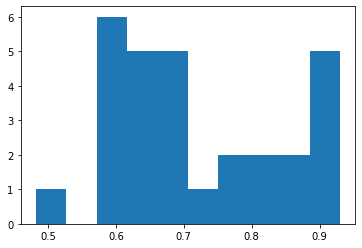

In [10]:

plt.hist(FS_exp, bins=10)

(array([2., 1., 1., 0., 0., 0., 0., 1., 0., 1.]),
 array([0.60376131, 0.63364942, 0.66353752, 0.69342563, 0.72331373,
        0.75320183, 0.78308994, 0.81297804, 0.84286614, 0.87275425,
        0.90264235]),
 <BarContainer object of 10 artists>)

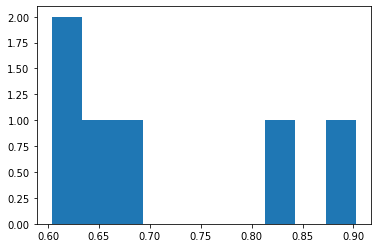

In [11]:
plt.hist(M2_exp2, bins=10)

(array([2., 1., 0., 0., 0., 0., 0., 1., 1., 1.]),
 array([0.77695591, 0.79235472, 0.80775352, 0.82315233, 0.83855114,
        0.85394994, 0.86934875, 0.88474756, 0.90014636, 0.91554517,
        0.93094398]),
 <BarContainer object of 10 artists>)

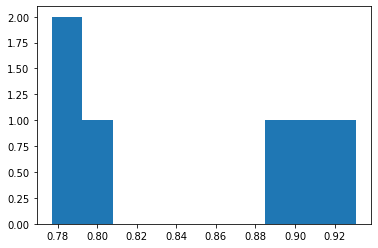

In [12]:
plt.hist(M3_exp2, bins=10)

## Training globally

In [13]:
shared_id_FS = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,None,None,None,30,31]
shared_id_M2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None,21,22,None,None,None,23,None,24,25,None,None,None,26,30,31]
shared_id_M3 = [None,21,22,23,None,24,25,26]
df_ev_FS_Global = df_FS_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M2_Global = df_M2_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M3_Global = df_M3_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_FS_Global["shared_id"] = shared_id_FS
df_ev_M2_Global["shared_id"] = shared_id_M2
df_ev_M3_Global["shared_id"] = shared_id_M3

df_ev_FS_TH.dropna(inplace=True)
df_ev_M2_TH.dropna(inplace=True)
df_ev_M3_TH.dropna(inplace=True)
df_merged = pd.merge(df_ev_FS_TH, df_ev_M2_TH, on="shared_id")
df_merged_tripple = pd.merge(df_merged, df_ev_M3_TH, on="shared_id")
# df_ev_M3_TH

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
df_merged["Increase F1"] = -df_merged["F1_ev_x"] + df_merged["F1_ev_y"]

print(df_merged["Increase F1"].sum()/29)
df_merged.head()

0.09135140126551725


,Name_x,precision_ev_x,recall_ev_x,F1_ev_x,accuracy_ev_x,shared_id,Name_y,precision_ev_y,recall_ev_y,F1_ev_y,accuracy_ev_y,Increase F1
0,S1A_el_sl_as,0.602503,0.672568,0.623255,0.868784,0.0,S1A+(el_sl_as),0.832898,0.729033,0.769542,0.949823,0.146287
1,S1A_el,0.701063,0.708911,0.704889,0.922565,1.0,S1A+el,0.715465,0.722530,0.718924,0.926475,0.014035
2,S1A_sl,0.709430,0.848757,0.755535,0.915472,2.0,S1A+sl,0.700703,0.808349,0.739131,0.914396,-0.016405
3,S1A_as,0.863019,0.901227,0.880963,0.967745,3.0,S1A+as,0.694198,0.917831,0.747854,0.895377,-0.133109
4,S1A_sl_as,0.640825,0.725819,0.668928,0.888329,4.0,S1A+(sl_as),0.714513,0.793233,0.745805,0.922373,0.076878


In [15]:
df_merged_tripple["Increase F1"] = -df_merged_tripple["F1_ev_y"] + df_merged_tripple["F1_ev"]
print(df_merged_tripple["Increase F1"].sum()/5)
df_merged_tripple.head()

-0.06497443253999999


,Name_x,precision_ev_x,recall_ev_x,F1_ev_x,accuracy_ev_x,shared_id,Name_y,precision_ev_y,recall_ev_y,F1_ev_y,accuracy_ev_y,Name,precision_ev,recall_ev,F1_ev,accuracy_ev,Increase F1
0,L8SR_S1_el,0.593753,0.650789,0.611404,0.868670,21.0,L8SR+(S1_el),0.848852,0.754209,0.792707,0.953806,L8SR+S1+el3,0.611377,0.713106,0.636826,0.861824,-0.155881
1,L8SR_S1_sl,0.947316,0.771424,0.834588,0.965665,22.0,L8SR+(S1_sl),0.951850,0.847631,0.891830,0.975341,L8SR+S1+sl3,0.920378,0.885687,0.902149,0.975852,0.010319
2,L8SR_S1_sl_el_as,0.682000,0.686256,0.684096,0.917747,23.0,L8SR+(S1_sl_el_as),0.843231,0.738716,0.779832,0.951856,L8SR+S1+(sl_el_as3),0.967872,0.752854,0.823751,0.964871,0.043919
3,L8SR_S1A_el,0.585801,0.667946,0.603761,0.846757,24.0,L8SR+(S1A_el),0.868078,0.968283,0.910826,0.973888,L8SR+S1A+el,0.634814,0.713859,0.661126,0.886494,-0.249700
4,L8SR_S1A_sl,0.897324,0.908134,0.902642,0.974603,25.0,L8SR+(S1A_sl),0.899424,0.969245,0.930944,0.980662,L8SR+S1A+sl,0.911807,0.975513,0.940908,0.983608,0.009964


# Visualizing local Training

## Setting Variables

In [16]:
# Test number to country
# 1 - Thailand
# 2 - Tibet
# 3 - Ghana
# 4 - Brazil
# 5 - Mexico
# 6 - Pakistan
# 7 - Egypt
# 8 - Cambodia
# 9 - India
# 10 - Bangladesh

# precision_table
precision_table_FS_TH = \
df_FS_TH[["test_1_precision", "test_2_precision",\
    "test_3_precision", "test_4_precision",\
    "test_5_precision", "test_6_precision",\
    "test_7_precision", "test_8_precision",\
    "test_9_precision", "test_10_precision"]]

# Recall_table
recall_table_FS_TH = \
df_FS_TH[["test_1_recall", "test_2_recall",\
    "test_3_recall", "test_4_recall",\
    "test_5_recall", "test_6_recall",\
    "test_7_recall", "test_8_recall",\
    "test_9_recall", "test_10_recall"]]

# F1_table
F1_table_FS_TH = \
df_FS_TH[["test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

df_ev_FS_TH = df_FS_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]


# F1_table
F1_table_M2_TH = \
df_M2_TH[["test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

df_ev_M2_TH = df_M2_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]



F1_table_M3_TH = \
df_M3_TH[["test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

df_ev_M3_TH = df_M3_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]



# F1_table
F1_table_FS_Global = \
df_FS_Global[["test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

df_ev_FS_Global = df_FS_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]


# F1_table
F1_table_M2_Global = \
df_M2_Global[["test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

df_ev_M2_Global = df_M2_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]



F1_table_M3_Global = \
df_M3_Global[["test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

df_ev_M3_Global = df_M3_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]



F1_NDWI = df_NDWI[["id", "Name", "F1_0.3", "F1_0.2", "F1_0.1", "F1_0"]]

# NDWI Results

In [20]:
F1_NDWI

,id,Name,F1_0.3,F1_0.2,F1_0.1,F1_0
0,1,test: 0,0.927697,0.961671,0.983364,0.990963
1,2,test: 1,0.966394,0.961456,0.957776,0.953094
2,3,test: 2,0.499270,0.499270,0.499270,0.519929
3,4,test: 3,0.727515,0.758919,0.797456,0.850543
4,5,test: 4,0.938624,0.952182,0.963141,0.972756
5,6,test: 5,0.725132,0.792941,0.878610,0.914018
6,7,test: 6,0.999752,0.999764,0.999544,0.998961
7,8,test: 7,0.916920,0.938587,0.954697,0.967208
8,9,test: 8,0.955647,0.966590,0.976211,0.984045
9,10,test: 9,0.756519,0.817527,0.849228,0.879614


In [21]:
print("threashold 0 average F1 performance: ", F1_NDWI["F1_0"].sum()/10)
print("threashold 0.1 average F1 performance: ", F1_NDWI["F1_0.1"].sum()/10)
print("threashold 0.2 average F1 performance: ", F1_NDWI["F1_0.2"].sum()/10)
print("threashold 0.3 average F1 performance: ", F1_NDWI["F1_0.3"].sum()/10)

threashold 0 average F1 performance:  0.90311308243
threashold 0.1 average F1 performance:  0.8859295530499999
threashold 0.2 average F1 performance:  0.86489066889
threashold 0.3 average F1 performance:  0.8413469893999999


## F test insights

In [118]:
# F1_table
table1 = df_FS_TH[["Name", "F1_ev", "test_1_F1"]]
table2 = df_FS_Global[["Name", "F1_ev", "test_1_F1"]]

table3 = df_M2_TH[["Name", "F1_ev", "test_1_F1"]]
table4 = df_M2_Global[["Name", "F1_ev", "test_1_F1"]]

table5 = df_M3_TH[["Name", "F1_ev", "test_1_F1"]]
table6 = df_M3_Global[["Name", "F1_ev", "test_1_F1"]]

table1.columns = ["Name", "F1_ev_TH", "F1_loc_TH"]
table2.columns = ["Name", "F1_ev_Global", "F1_loc_Global"]
table3.columns = ["Name", "F1_ev_TH", "F1_loc_TH"]
table4.columns = ["Name", "F1_ev_Global", "F1_loc_Global"]
table5.columns = ["Name", "F1_ev_TH", "F1_loc_TH"]
table6.columns = ["Name", "F1_ev_Global", "F1_loc_Global"]

combined_table = pd.merge(table1, table2, on="Name")
combined_table2 = pd.merge(table3, table4, on="Name")
combined_table3 = pd.merge(table5, table6, on="Name")

# print(f_test(FS_exp, M2_exp))
# print(f_test(M2_exp2, M3_exp2))
# print(scipy.stats.kruskal(FS_exp, M2_exp))
# print(scipy.stats.kruskal(M2_exp2, M3_exp2))

def serieswithThreshold(threshold, input_table):
    Greater90Df = (input_table > threshold).astype(int)
    Greater90Df["sum"] = Greater90Df["test_1_F1"] + Greater90Df["test_2_F1"] +\
                        Greater90Df["test_3_F1"] + Greater90Df["test_4_F1"] +\
                        Greater90Df["test_5_F1"] + Greater90Df["test_6_F1"] +\
                        Greater90Df["test_7_F1"] + Greater90Df["test_8_F1"] +\
                        Greater90Df["test_9_F1"] + Greater90Df["test_10_F1"]
    return Greater90Df["sum"]

combined_table["F1_TS_TH"] = serieswithThreshold(0.9, F1_table_FS_TH)
combined_table["F1_TS_Global"] = serieswithThreshold(0.9, F1_table_FS_Global)
combined_table2["F1_TS_TH"] = serieswithThreshold(0.9, F1_table_M2_TH)
combined_table2["F1_TS_Global"] = serieswithThreshold(0.9, F1_table_M2_Global)
combined_table3["F1_TS_TH"] = serieswithThreshold(0.9, F1_table_M3_TH)
combined_table3["F1_TS_Global"] = serieswithThreshold(0.9, F1_table_M3_Global)
final_table = pd.concat([combined_table, combined_table2, combined_table3])
final_table

,Name,F1_ev_TH,F1_loc_TH,F1_ev_Global,F1_loc_Global,F1_TS_TH,F1_TS_Global
0,S1A_el_sl_as,0.623255,0.965357,0.697899,0.860682,1,1
1,S1A_el,0.704889,0.969936,0.574519,0.471244,1,1
2,S1A_sl,0.755535,0.974068,0.498406,0.515413,4,0
3,S1A_as,0.880963,0.952134,0.910645,0.959582,3,5
4,S1A_sl_as,0.668928,0.866683,0.921979,0.948660,0,4
...,...,...,...,...,...,...,...
3,L8SR+S1+(sl_el_as3),0.823751,0.989727,0.955914,0.978017,7,8
4,L8SR+S1A+as,0.935313,0.978214,0.966446,0.978207,6,8
5,L8SR+S1A+el,0.661126,0.973231,0.965181,0.972658,2,9
6,L8SR+S1A+sl,0.940908,0.987191,0.970543,0.983768,8,9



- If train in Thailand, test in Thailand will have higher F1 score than if it was trained globally
- If train globally, test globally will have higher F1 score than if it was trained locally in Thailand
- If train globally, test Threshold globally will have higher count of F1 more than 90 \% than if it was trained locally in Thailand.

In [123]:
# If train in Thailand, test in Thailand will have higher F1 score than if it was trained globally
thai_train_ev = np.array(final_table["F1_loc_TH"])
global_train_ev = np.array(final_table["F1_loc_Global"])
print(f_test(global_train_ev, thai_train_ev))
print(scipy.stats.kruskal(thai_train_ev, global_train_ev))

# If train globally, test globally will have higher F1 score than if it was trained locally in Thailand
thai_train_ev = np.array(final_table["F1_ev_TH"])
global_train_ev = np.array(final_table["F1_ev_Global"])
print(f_test(global_train_ev, thai_train_ev))
print(scipy.stats.kruskal(thai_train_ev, global_train_ev))

# If train globally, test Threshold globally will have higher count of F1 more than 90 % than if it was trained locally in Thailand.
thai_train_ev = np.array(final_table["F1_TS_TH"])
global_train_ev = np.array(final_table["F1_TS_Global"])
print(f_test(global_train_ev, thai_train_ev))
print(scipy.stats.kruskal(thai_train_ev, global_train_ev))

(6.335319703559658, 2.3203661214665772e-14)
KruskalResult(statistic=13.97431454681455, pvalue=0.00018532520116351395)
(1.9509839213130018, 0.0020051002802896623)
KruskalResult(statistic=12.784969450323501, pvalue=0.0003494154718249849)
(1.477386060535776, 0.0454888537065683)
KruskalResult(statistic=0.572765782217469, pvalue=0.4491619566508016)


## Ranking performance globally

In [23]:
df_ev_FS_TH.sort_values(by=['F1_ev'], ascending=False).head()

,Name,precision_ev,recall_ev,F1_ev,accuracy_ev
27,L8SR,0.907786,0.977207,0.939213,0.983014
18,L8SR_sl_as,0.945031,0.916470,0.930192,0.982609
16,L8SR_sl,0.959054,0.902296,0.928484,0.982727
17,L8SR_as,0.952101,0.905331,0.927217,0.982233
11,S1_sl_as,0.935533,0.914062,0.924477,0.981041


In [103]:
df_ev_M2_TH.sort_values(by=['F1_ev'], ascending=False).head()

,Name,precision_ev,recall_ev,F1_ev,accuracy_ev
21,L8SR+(S1_as),0.954663,0.974022,0.964103,0.990564
16,L8SR+sl,0.954279,0.970890,0.962408,0.990148
17,L8SR+as,0.930811,0.974728,0.951497,0.986878
24,L8SR+(S1_sl_as),0.913319,0.975553,0.941816,0.983891
28,L8SR+(S1A_as),0.911547,0.977787,0.941697,0.983779


In [104]:
df_ev_M3_TH.sort_values(by=['F1_ev'], ascending=False).head()

,Name,precision_ev,recall_ev,F1_ev,accuracy_ev
6,L8SR+S1A+sl,0.911807,0.975513,0.940908,0.983608
4,L8SR+S1A+as,0.912305,0.961668,0.935313,0.982350
2,L8SR+S1+sl3,0.920378,0.885687,0.902149,0.975852
0,L8SR+S1+as,0.909744,0.830791,0.865313,0.968650
3,L8SR+S1+(sl_el_as3),0.967872,0.752854,0.823751,0.964871


In [105]:
df_ev_FS_Global.sort_values(by=['F1_ev'], ascending=False).head()

,Name,precision_ev,recall_ev,F1_ev,accuracy_ev
27,L8SR,0.969897,0.951897,0.960690,0.990077
25,L8SR_S1A_sl,0.967316,0.945546,0.956126,0.988971
22,L8SR_S1_sl,0.952404,0.954146,0.953273,0.987951
16,L8SR_sl,0.949013,0.935314,0.942038,0.985310
30,L8SR_S1,0.934192,0.941354,0.937738,0.983844


In [106]:
df_ev_M2_Global.sort_values(by=['F1_ev'], ascending=False).head()

,Name,precision_ev,recall_ev,F1_ev,accuracy_ev
30,L8SR+(S1A_sl),0.969522,0.973432,0.971467,0.992626
23,L8SR+(S1_sl),0.969991,0.971661,0.970824,0.992478
16,L8SR+sl,0.971193,0.969166,0.970177,0.992341
17,L8SR+as,0.965623,0.971554,0.968566,0.991859
26,L8SR+(S1_el_as),0.971350,0.965078,0.968189,0.991868


In [107]:
df_ev_M3_Global.sort_values(by=['F1_ev'], ascending=False).head()

,Name,precision_ev,recall_ev,F1_ev,accuracy_ev
6,L8SR+S1A+sl,0.969306,0.971787,0.970543,0.992399
7,L8SR+S1A+(sl_el_as),0.970584,0.968270,0.969424,0.992150
2,L8SR+S1+sl3,0.971094,0.966925,0.968999,0.992057
1,L8SR+S1+el3,0.959271,0.974940,0.966950,0.991349
4,L8SR+S1A+as,0.961677,0.971333,0.966446,0.991274


## Ranking performance

In [17]:
F1_table_FS_TH.sort_values(by=['test_2_F1'], ascending=False).head()

,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
18,0.960319,0.957864,0.499264,0.821711,0.910668,0.600721,0.997300,0.922353,0.622334,0.616453
17,0.954825,0.956983,0.499268,0.797558,0.896586,0.570737,0.988797,0.914989,0.612659,0.612474
11,0.964140,0.956347,0.500209,0.811346,0.916406,0.605972,0.777604,0.922153,0.678832,0.627782
16,0.949147,0.955660,0.499457,0.805101,0.902385,0.606479,0.998589,0.916058,0.612852,0.632262
3,0.952134,0.953388,0.499341,0.777421,0.897823,0.573669,0.540273,0.916014,0.761137,0.641015


In [30]:
df_FS_TH[["Name", "test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
0,S1A_el_sl_as,0.965357,0.448320,0.508672,0.821670,0.451982,0.684126,0.827495,0.462297,0.576500,0.098304
1,S1A_el,0.969936,0.448308,0.634651,0.657232,0.675115,0.498681,0.751391,0.788713,0.495036,0.673191
2,S1A_sl,0.974068,0.719012,0.663786,0.714192,0.945986,0.612640,0.402319,0.964998,0.925860,0.894062
3,S1A_as,0.952134,0.953388,0.499341,0.777421,0.897823,0.573669,0.540273,0.916014,0.761137,0.641015
4,S1A_sl_as,0.866683,0.634280,0.503108,0.723500,0.784021,0.525912,0.364319,0.864106,0.850951,0.827676
5,S1A_el_sl,0.962003,0.448308,0.629559,0.768866,0.605136,0.611296,0.487603,0.822699,0.496738,0.883151
6,S1A_el_as,0.966873,0.448308,0.634426,0.714960,0.511988,0.529838,0.541578,0.571455,0.705232,0.392487
7,S1_el_sl_as,0.962026,0.448308,0.512340,0.805437,0.467284,0.584833,0.854764,0.501948,0.606040,0.191858
8,S1_el,0.972496,0.448308,0.638590,0.715630,0.447223,0.593331,0.469318,0.454437,0.500221,0.126279
9,S1_sl,0.970194,0.679721,0.649805,0.841040,0.941326,0.757884,0.488715,0.952067,0.857218,0.884848


In [18]:
F1_table_M2_TH.sort_values(by=['test_2_F1'], ascending=False).head()

,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
11,0.970193,0.950195,0.632232,0.834516,0.928034,0.703366,0.484115,0.932648,0.812828,0.809988
16,0.982999,0.948579,0.499270,0.904250,0.952532,0.916419,0.999687,0.974579,0.973877,0.851823
21,0.988401,0.944655,0.617380,0.912372,0.964219,0.917734,0.998615,0.973323,0.980848,0.872095
18,0.979333,0.940822,0.501183,0.828114,0.886430,0.897618,0.999073,0.944392,0.967266,0.608085
10,0.967992,0.940422,0.639810,0.802439,0.935767,0.673519,0.435268,0.951282,0.897720,0.875378


In [19]:
F1_table_M3_TH.sort_values(by=['test_2_F1'], ascending=False).head()

,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
7,0.981566,0.963195,0.764662,0.894319,0.954298,0.926425,0.999776,0.970428,0.979153,0.907786
6,0.987191,0.885781,0.751974,0.913875,0.967026,0.916458,0.996839,0.974586,0.982151,0.900395
4,0.978214,0.882785,0.733672,0.844319,0.949559,0.913194,0.995806,0.965135,0.982208,0.890955
2,0.989628,0.778166,0.764336,0.920508,0.975125,0.915140,0.992588,0.981294,0.986432,0.898734
0,0.984526,0.691358,0.651807,0.901524,0.963321,0.894937,0.773128,0.969846,0.978080,0.881236


In [23]:
F1_table_FS_Global.sort_values(by=['test_2_F1'], ascending=False).head()

,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
25,0.962402,0.960735,0.575322,0.878867,0.928524,0.837444,0.999698,0.961209,0.941761,0.886475
9,0.962995,0.959329,0.541124,0.847382,0.933577,0.712215,0.851839,0.938644,0.687590,0.698677
22,0.966347,0.957132,0.613633,0.845927,0.936987,0.861410,0.973017,0.964559,0.933767,0.857689
10,0.961287,0.956286,0.500319,0.803932,0.913474,0.599467,0.832890,0.921674,0.628465,0.619117
4,0.948660,0.955480,0.499340,0.801954,0.901310,0.578421,0.873204,0.915888,0.612742,0.618047


In [24]:
F1_table_M2_Global.sort_values(by=['test_2_F1'], ascending=False).head()

,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
14,0.980010,0.968298,0.504336,0.854261,0.944760,0.899122,0.999683,0.971478,0.973296,0.874716
33,0.978295,0.968120,0.627625,0.882301,0.943503,0.878462,0.999791,0.969525,0.969343,0.889606
26,0.979047,0.968088,0.558445,0.880431,0.947510,0.903842,0.999384,0.969282,0.973721,0.882839
25,0.969715,0.967619,0.656866,0.887947,0.917826,0.907317,0.998635,0.973501,0.954703,0.928916
23,0.982563,0.966609,0.730072,0.897510,0.954450,0.928699,0.999810,0.972079,0.979172,0.920286


In [29]:
df_FS_Global[["Name", "test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
0,S1A_el_sl_as,0.860682,0.449780,0.499388,0.794861,0.626063,0.609391,0.703143,0.913846,0.491990,0.627845
1,S1A_el,0.471244,0.448308,0.499263,0.721974,0.686950,0.579539,0.495954,0.960608,0.491567,0.857516
2,S1A_sl,0.515413,0.522059,0.456413,0.468841,0.467014,0.462394,0.455288,0.492378,0.477036,0.482876
3,S1A_as,0.959582,0.917210,0.499270,0.809557,0.913559,0.607547,0.900281,0.921075,0.623366,0.647827
4,S1A_sl_as,0.948660,0.955480,0.499340,0.801954,0.901310,0.578421,0.873204,0.915888,0.612742,0.618047
5,S1A_el_sl,0.922353,0.448325,0.539243,0.688104,0.685398,0.576817,0.803330,0.956439,0.494687,0.853328
6,S1A_el_as,0.923190,0.463429,0.499330,0.798488,0.662224,0.588664,0.875143,0.925349,0.591509,0.701066
7,S1_el_sl_as,0.937351,0.452527,0.499267,0.808129,0.640494,0.587482,0.870981,0.917407,0.545196,0.623550
8,S1_el,0.471233,0.448308,0.499270,0.788465,0.683777,0.697721,0.494635,0.855259,0.491568,0.916057
9,S1_sl,0.962995,0.959329,0.541124,0.847382,0.933577,0.712215,0.851839,0.938644,0.687590,0.698677


In [27]:
df_M2_Global[["Name", "test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
0,S1A+(el_sl_as),0.910038,0.628144,0.593672,0.778585,0.729017,0.675760,0.608560,0.932134,0.662143,0.879489
1,S1A+el,0.529150,0.595107,0.515065,0.676127,0.662925,0.594748,0.440670,0.520776,0.618238,0.782927
2,S1A+sl,0.942138,0.789375,0.499270,0.809292,0.897525,0.576454,0.948363,0.909985,0.607594,0.627803
3,S1A+as,0.950713,0.786164,0.499270,0.811286,0.901749,0.594094,0.893990,0.917942,0.619368,0.642000
4,S1A+(sl_as),0.939275,0.953093,0.499851,0.780617,0.890062,0.574831,0.851910,0.911739,0.612801,0.626190
5,S1A+(el_sl),0.812213,0.611254,0.675233,0.789579,0.690998,0.665797,0.434686,0.555820,0.714858,0.853847
6,S1A+(el_as),0.944568,0.585788,0.643734,0.777783,0.895025,0.649330,0.575186,0.958142,0.701518,0.897113
7,S1+(el_sl_as),0.907010,0.592033,0.509313,0.759626,0.843777,0.559414,0.584880,0.829039,0.584758,0.702085
8,S1+el,0.471377,0.449824,0.499270,0.494136,0.495970,0.495703,0.494077,0.486616,0.491690,0.491958
9,S1+sl,0.951886,0.649908,0.499270,0.830794,0.881955,0.626173,0.546408,0.824547,0.605987,0.661278


In [25]:
F1_table_M3_Global.sort_values(by=['test_2_F1'], ascending=False).head()

,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
2,0.980198,0.965980,0.716950,0.894015,0.950829,0.918313,0.999776,0.969435,0.973597,0.918997
7,0.981566,0.963195,0.764662,0.894319,0.954298,0.926425,0.999776,0.970428,0.979153,0.907786
6,0.983768,0.963065,0.714661,0.906978,0.955910,0.929898,0.999810,0.970747,0.980976,0.929405
5,0.972658,0.961594,0.727698,0.900446,0.936030,0.916289,0.999652,0.970454,0.971440,0.934094
1,0.978768,0.960140,0.763420,0.895281,0.944457,0.924672,0.999543,0.971684,0.973866,0.931441


In [31]:
df_M3_Global[["Name", "test_1_F1", "test_2_F1",\
    "test_3_F1", "test_4_F1",\
    "test_5_F1", "test_6_F1",\
    "test_7_F1", "test_8_F1",\
    "test_9_F1", "test_10_F1"]]

,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1
0,L8SR+S1+as,0.969781,0.956737,0.748509,0.883475,0.926664,0.884323,0.997755,0.962859,0.963206,0.881896
1,L8SR+S1+el3,0.978768,0.960140,0.763420,0.895281,0.944457,0.924672,0.999543,0.971684,0.973866,0.931441
2,L8SR+S1+sl3,0.980198,0.965980,0.716950,0.894015,0.950829,0.918313,0.999776,0.969435,0.973597,0.918997
3,L8SR+S1+(sl_el_as3),0.978017,0.933787,0.745564,0.902480,0.959577,0.913283,0.999710,0.976353,0.975135,0.886311
4,L8SR+S1A+as,0.978207,0.959970,0.728871,0.888151,0.951023,0.920423,0.999776,0.969772,0.975279,0.928508
5,L8SR+S1A+el,0.972658,0.961594,0.727698,0.900446,0.936030,0.916289,0.999652,0.970454,0.971440,0.934094
6,L8SR+S1A+sl,0.983768,0.963065,0.714661,0.906978,0.955910,0.929898,0.999810,0.970747,0.980976,0.929405
7,L8SR+S1A+(sl_el_as),0.981566,0.963195,0.764662,0.894319,0.954298,0.926425,0.999776,0.970428,0.979153,0.907786


## Best Model

The top 5 overall best model is: 

 - M2_global: <b>L8SR+(S1A_sl)</b> is the best model with F1: 0.971467
 - M2_global: <b>L8SR+(S1_sl)</b> with F1: 0.970824
 - M3_global: <b>L8SR+S1A+sl</b> with F1: 0.970543
 - M2_global: <b>L8SR+sl </b> with F1: 0.970177
 - M3_global <b>L8SR+S1A+(sl_el_as)</b> with F1: 0.969424
 
 
The top 5 for Thailand Training

- M2_TH: <b>L8SR+(S1_as)</b> with F1: 0.964103
- M2_TH: <b>L8SR+sl</b> with F1: 0.962408
- M2_TH: <b>L8SR+as	</b> with F1: 0.951497
- M2_TH: <b>L8SR+(S1_sl_as)</b> with F1: 0.941816	
- M2_TH: <b>L8SR+(S1A_as)</b> with F1: 0.941697

With more general training samples, the number of models with F1 greater than 80% increases.


Baseline NDWI F1 score is 84-90% 


The top performing models in Thailand:

- M2_TH: L8SR+(S1A_sl): 0.99134
- L8SR: 0.990032
- M2_TH: L8SR+(S1_sl): 0.989871
- M2_global: <b>L8SR+(S1A_sl)</b> F1: 0.983988


<b> Conclusion </b>

If want to test globally, not in Thailand, use <b>L8SR+(S1A_sl)</b>

If want to test locally in Thailand use <b>L8SR+(S1A_sl)</b>

## Improvement comparison

In [33]:
# F1-Score ranges:
# > 0.9	Very good
# 0.8 - 0.9	Good
# 0.5 - 0.8	OK
# < 0.5	Not good


Overall there is an increase from FS to M2 both in global and training in Thailand (6 to 9 % averagely), but there is a decrease in model performance from M2 to M3 around 6% So, M2 seems to be the best model already

# Hyperparameter Tuning

In [10]:
df_hyperparameter_TH.sort_values(by=['F1_th'], ascending=False)

,id,Name,precision_ev,recall_ev,F1_ev,accuracy_ev,precision_th,recall_th,F1_th,accuracy_th
3,4,L8SR_S1A_sl_CC_dp0.3,0.909190,0.980496,0.941398,0.983594,0.994557,0.989821,0.992174,0.996979
2,3,L8SR_S1A_sl_CCDICE_dp0.2,0.907412,0.909079,0.908243,0.976337,0.991850,0.992491,0.992170,0.996961
4,5,L8SR_S1A_sl_FL_dp0.3,0.943531,0.979298,0.960589,0.989447,0.995210,0.985913,0.990504,0.996351
6,7,L8SR_S1A_sl_CC_dp0.4,0.934239,0.973394,0.952809,0.987305,0.992840,0.984379,0.988561,0.995601
5,6,L8SR_S1A_sl_CCDICE_dp0.3,0.945886,0.978870,0.961679,0.989772,0.988627,0.982712,0.985646,0.994466
0,1,L8SR_S1A_sl_CC_dp0.2,0.944963,0.970264,0.957198,0.988670,0.991494,0.978425,0.984843,0.994199
8,9,L8SR_S1A_sl_CCDICE_dp0.4,0.944559,0.971883,0.957737,0.988788,0.984003,0.985307,0.984654,0.994040
1,2,L8SR_S1A_sl_FL_dp0.2,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191
7,8,L8SR_S1A_sl_FL_dp0.4,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191


In [7]:
df_hyperparameter_Global.sort_values(by=['F1_ev'], ascending=False)

,id,Name,Loss,val_loss,precision_ev,recall_ev,F1_ev,accuracy_ev,precision_th,recall_th,F1_th,accuracy_th
8,9,L8SR_S1A_sl_CCDICE_dp0.4,0.016419,0.038833,0.974030,0.970193,0.972102,0.992849,0.993484,0.972405,0.982643,0.993411
2,3,L8SR_S1A_sl_CCDICE_dp0.2,0.016196,0.042706,0.973838,0.970221,0.972021,0.992827,0.994723,0.973683,0.983904,0.993889
5,6,L8SR_S1A_sl_CCDICE_dp0.3,0.017367,0.041371,0.973556,0.969687,0.971612,0.992724,0.993462,0.969208,0.980935,0.992786
6,7,L8SR_S1A_sl_CC_dp0.4,0.011740,0.030767,0.974703,0.966188,0.970400,0.992450,0.993587,0.971236,0.982072,0.993203
0,1,L8SR_S1A_sl_CC_dp0.2,0.010992,0.030646,0.957162,0.981175,0.968805,0.991760,0.989386,0.983020,0.986175,0.994673
3,4,L8SR_S1A_sl_CC_dp0.3,0.010886,0.031779,0.969032,0.965466,0.967241,0.991601,0.993548,0.965003,0.978719,0.991983
1,2,L8SR_S1A_sl_FL_dp0.2,0.652231,0.274263,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191
4,5,L8SR_S1A_sl_FL_dp0.3,0.570534,0.274263,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191
7,8,L8SR_S1A_sl_FL_dp0.4,0.591055,0.274263,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191


Summary:
Best model to improve thailand prediction is:
L8SR_S1A_sl_CC_dp0.3 with F1 score of 0.992174, improving the previous 0.99134. Same parameter was the optimal

Best model to improve global prediction is:
L8SR_S1A_sl_CCDICE_dp0.4 with F1 score of 0.972102, improving the previous 0.971467


